In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [6]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 65s 166ms/step - loss: 0.4835 - accuracy: 0.7730 - val_loss: 0.6033 - val_accuracy: 0.6412
Epoch 2/10
391/391 [==============================] - 64s 164ms/step - loss: 0.4099 - accuracy: 0.8100 - val_loss: 0.4556 - val_accuracy: 0.8151
Epoch 3/10
391/391 [==============================] - 65s 165ms/step - loss: 0.2146 - accuracy: 0.9200 - val_loss: 0.4590 - val_accuracy: 0.8387
Epoch 4/10
391/391 [==============================] - 64s 165ms/step - loss: 0.1805 - accuracy: 0.9337 - val_loss: 0.5094 - val_accuracy: 0.8216
Epoch 6/10
391/391 [==============================] - 64s 165ms/step - loss: 0.1294 - accuracy: 0.9538 - val_loss: 0.5548 - val_accuracy: 0.8140
Epoch 7/10
391/391 [==============================] - 64s 165ms/step - loss: 0.0853 - accuracy: 0.9718 - val_loss: 0.6452 - val_accuracy: 0.8364
Epoch 8/10
391/391 [==============================] - 64s 165ms/step - loss: 0.0728 - accuracy: 0.9770 - val_loss: 0.7261 - val_ac

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

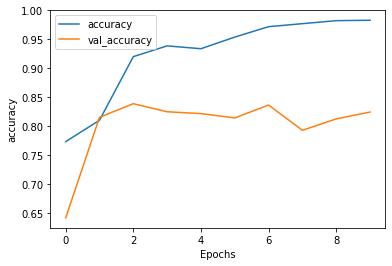

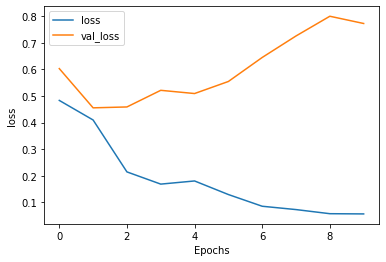

In [18]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')